**Dealing with missing values**

___



# Visualise missing values


From https://towardsdatascience.com/visualize-missing-values-with-missingno-ad4d938b00a1



## Import libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
 # library specialising in visualising missing data
import missingno as msno
# allows rendering of visualisations in Jupyter notebook
%matplotlib inline 

# Import data - using the Kaggle House Price competition training set for this example

data = pd.read_csv('train.csv')


## Make DataFrame with only missing data

In [2]:
# isna returns missing values
missingdata = (data.isna().sum() > 0) # this is a series with dtype: bool
missingdata = missingdata.to_numpy() # converts series into numpy array, so now have a boolean array
only_missing_data = data[data.columns[missingdata]] # data.columns returns an index, convert this to a DataFrame
only_missing_data # this is now a DataFrame containing only the columns and rows where there is missing data in the column

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [3]:
# Want to sort the dataframe columns based on number of missing values in each column

number_missing_data = only_missing_data.isna().sum().to_numpy() # array with number of missing values in each column
column_names = only_missing_data.columns.to_numpy() # this gives an array containing column names
missing = np.vstack((column_names, number_missing_data)) # make array by combining number of missing data and column name
missing = pd.DataFrame(missing) # convert to pandas dataframe with row 0 containing column names, row 1 sum of missing data
missing = missing.T # transpose - first column now column names, second column sum of missing values
missing = missing.sort_values(by=1, axis=0, ascending=False) # column names = 0,1, so sort on second column, largest to smallest
missing = missing.T # missing now has sorted column names in first row
missing

,16,18,1,17,10,0,11,12,13,14,15,6,8,7,5,4,3,2,9
0,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical
1,1453,1406,1369,1179,690,259,81,81,81,81,81,38,38,37,37,37,8,8,1


In [4]:
# now sort DataFrame "only_missing_data" columns based on column order in "missing" DataFrame
column_order = missing.iloc[0, :] # this is a series
column_order = column_order.to_numpy() # convert series to array
#column_order
only_missing_data = only_missing_data.reindex(column_order, axis=1)
only_missing_data

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical
0,NaN,NaN,NaN,NaN,NaN,65.0,Attchd,2003.0,RFn,TA,TA,No,Unf,GLQ,TA,Gd,196.0,BrkFace,SBrkr
1,NaN,NaN,NaN,NaN,TA,80.0,Attchd,1976.0,RFn,TA,TA,Gd,Unf,ALQ,TA,Gd,0.0,None,SBrkr
2,NaN,NaN,NaN,NaN,TA,68.0,Attchd,2001.0,RFn,TA,TA,Mn,Unf,GLQ,TA,Gd,162.0,BrkFace,SBrkr
3,NaN,NaN,NaN,NaN,Gd,60.0,Detchd,1998.0,Unf,TA,TA,No,Unf,ALQ,Gd,TA,0.0,None,SBrkr
4,NaN,NaN,NaN,NaN,TA,84.0,Attchd,2000.0,RFn,TA,TA,Av,Unf,GLQ,TA,Gd,350.0,BrkFace,SBrkr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,NaN,NaN,NaN,TA,62.0,Attchd,1999.0,RFn,TA,TA,No,Unf,Unf,TA,Gd,0.0,None,SBrkr
1456,NaN,NaN,NaN,MnPrv,TA,85.0,Attchd,1978.0,Unf,TA,TA,No,Rec,ALQ,TA,Gd,119.0,Stone,SBrkr
1457,NaN,Shed,NaN,GdPrv,Gd,66.0,Attchd,1941.0,RFn,TA,TA,No,Unf,GLQ,Gd,TA,0.0,None,SBrkr
1458,NaN,NaN,NaN,NaN,NaN,68.0,Attchd,1950.0,Unf,TA,TA,Mn,Rec,GLQ,TA,TA,0.0,None,FuseA


## Use MissingNo library to visualise missing data

### Matrix plot

<AxesSubplot:>

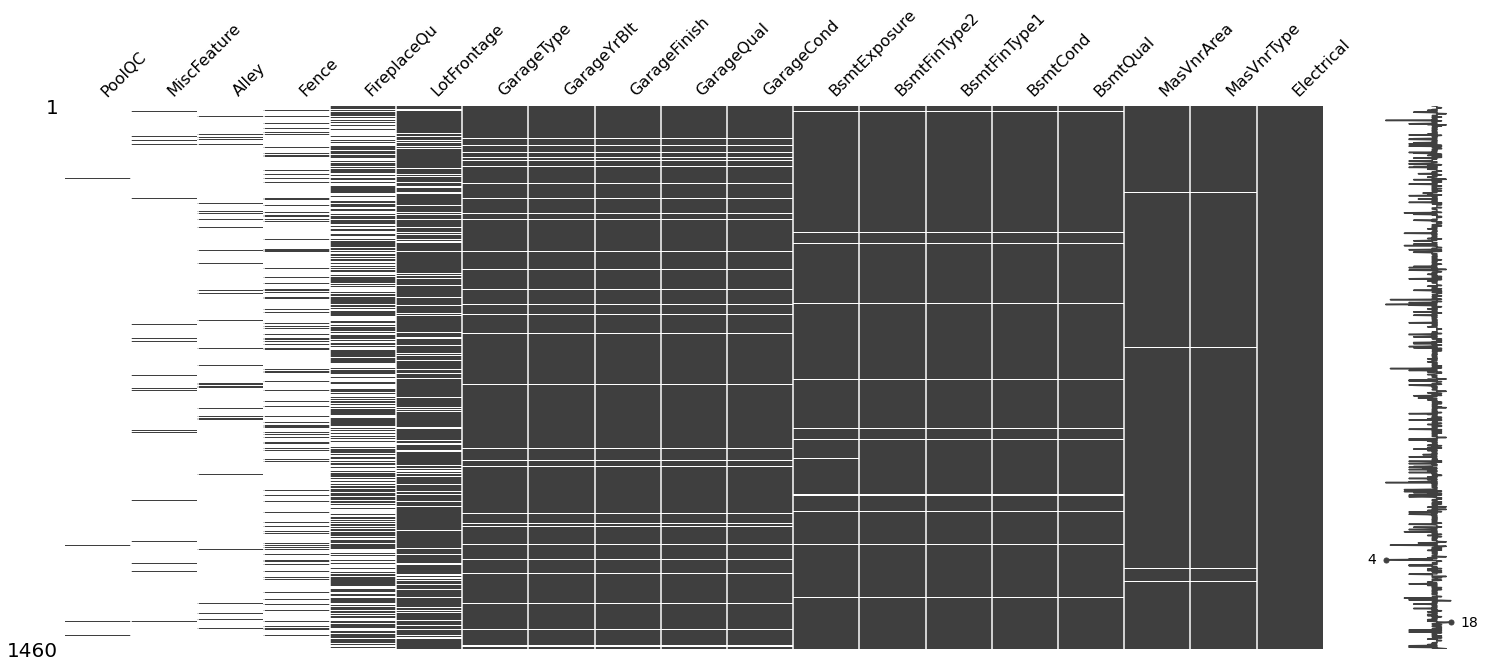

In [5]:
# Now using missingno library to visualise missing values
# White lines represent missing data
msno.matrix(only_missing_data)

### Heatmap

<AxesSubplot:>

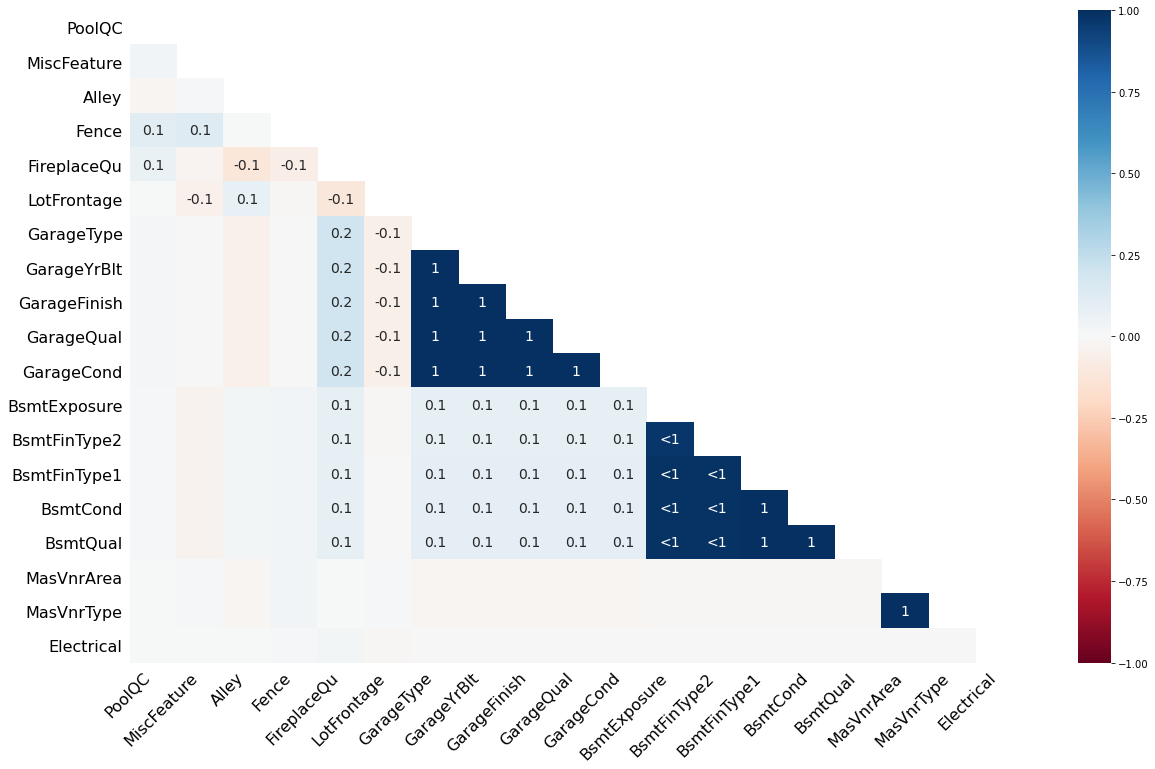

In [6]:
# Positive correlation is proportional to the level of darkness in blue as indicated by the bar on the right side.

msno.heatmap(only_missing_data)

### Dendogram

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. 

Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity, then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched", how many values you would have to fill in or drop, if you are so inclined.

<AxesSubplot:>

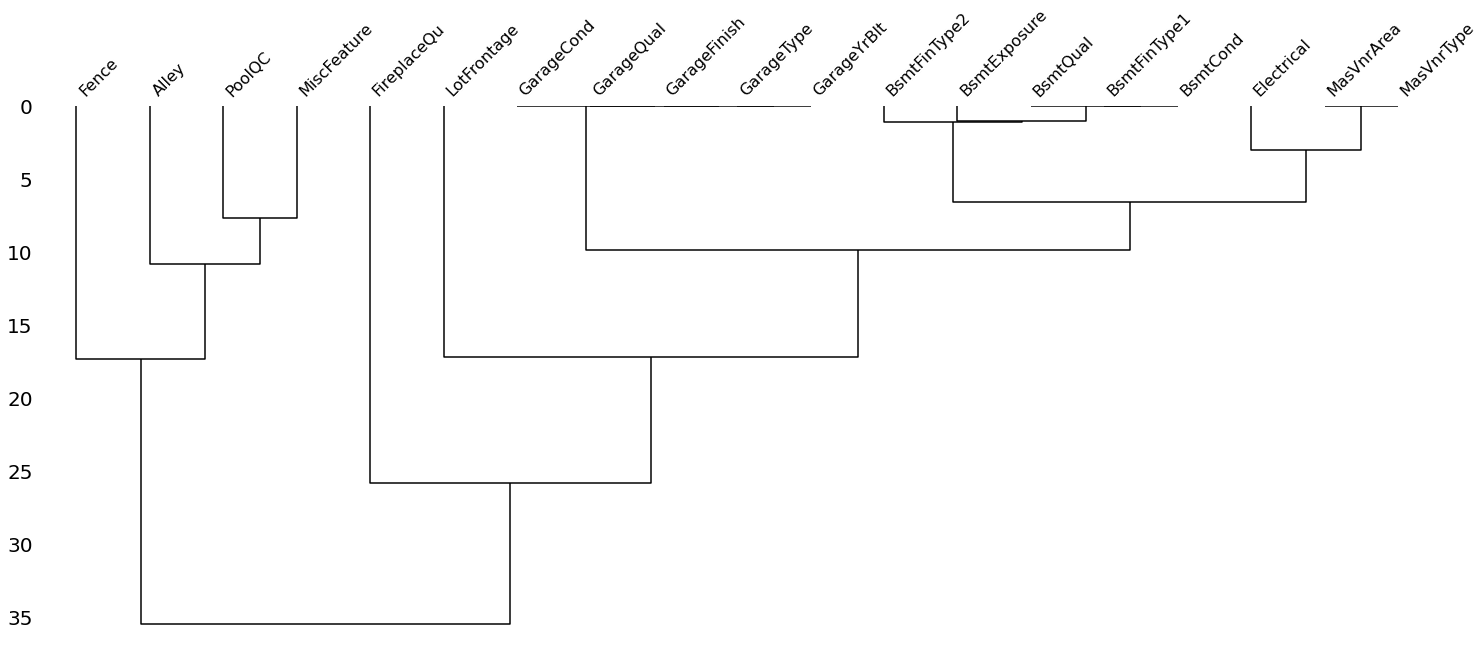

In [7]:
msno.dendrogram(only_missing_data)

### Bar plot of missing values

It shows bars that are proportional to the number of non-missing values 
as well as providing the actual number of **NON-MISSING** values. 
We get an idea of how much of each column is missing.


<AxesSubplot:>

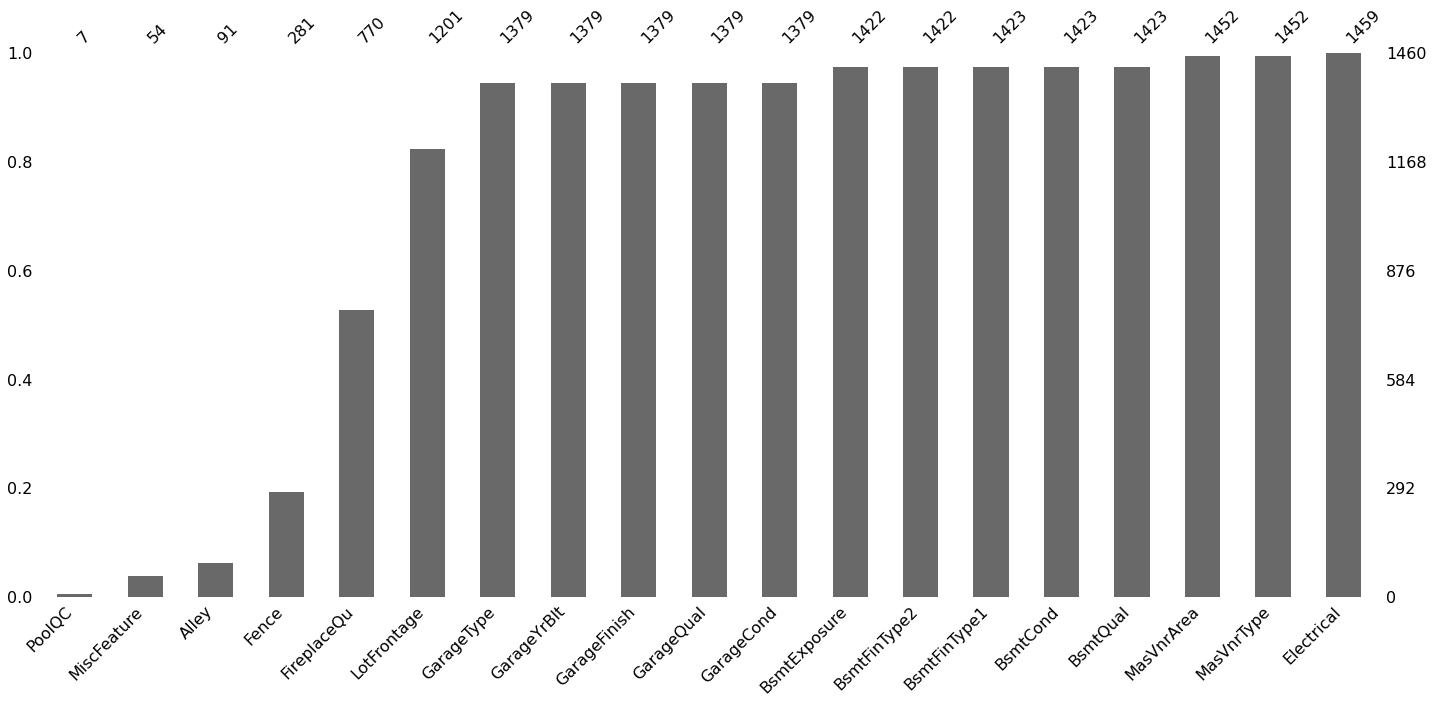

In [10]:
msno.bar(only_missing_data)

# Impute values